In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim

In [4]:
plt.style.use('default')
sns.set_theme()
df = pd.read_csv('data.csv')

In [5]:
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (30697, 25)

First 5 rows:


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [6]:
display(df.dtypes)
display(df.describe())
display(df.isnull().sum())
#Check the distribution of the target variable
display(df['shot_made_flag'].value_counts(normalize=True))

,0
action_type,object
combined_shot_type,object
game_event_id,int64
game_id,int64
lat,float64
loc_x,int64
loc_y,int64
lon,float64
minutes_remaining,int64
period,int64


,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


,0
action_type,0
combined_shot_type,0
game_event_id,0
game_id,0
lat,0
loc_x,0
loc_y,0
lon,0
minutes_remaining,0
period,0


,proportion
shot_made_flag,
0.0,0.553839
1.0,0.446161


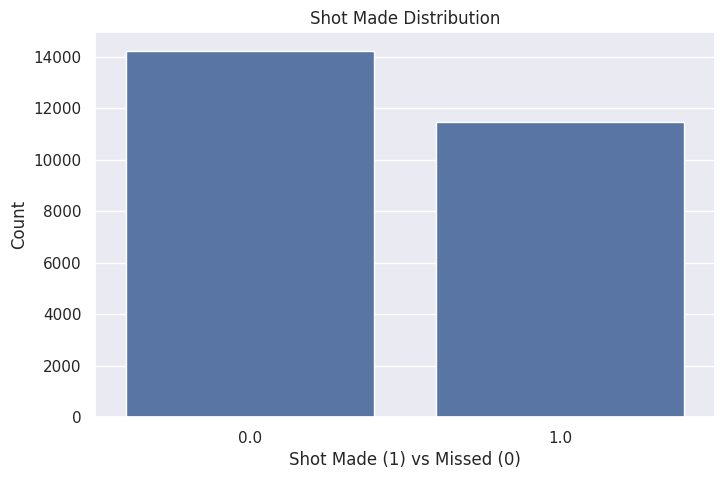

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x='shot_made_flag', data=df)
plt.title('Shot Made Distribution')
plt.xlabel('Shot Made (1) vs Missed (0)')
plt.ylabel('Count')
plt.show()

In [8]:
#Handle missing values in target variable
df_clean = df.dropna(subset=['shot_made_flag'])

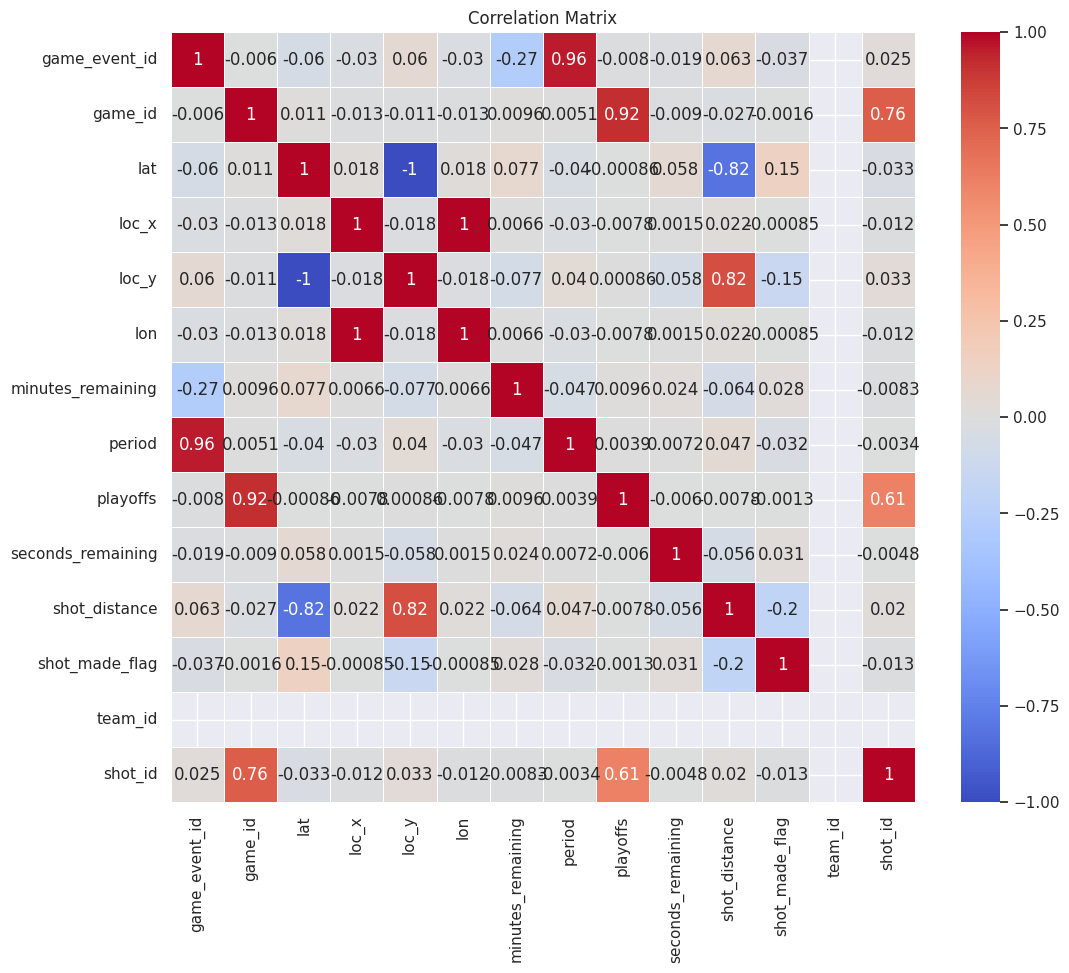

In [9]:
#Explore correlations
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 10))
correlation = df_clean[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

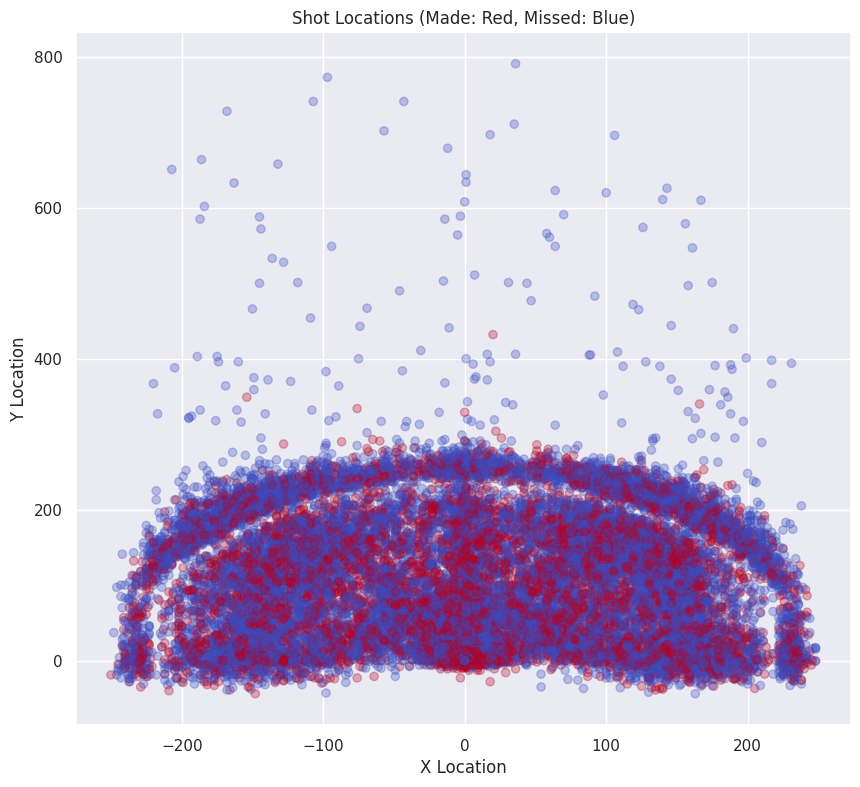

In [73]:
#Visualize shot locations
plt.figure(figsize=(10, 9))
plt.scatter(df_clean.loc_x, df_clean.loc_y, alpha=0.3,
            c=df_clean.shot_made_flag, cmap='coolwarm')
plt.title('Shot Locations (Made: Red, Missed: Blue)')
plt.xlabel('X Location')
plt.ylabel('Y Location')
plt.grid(True)
plt.show()

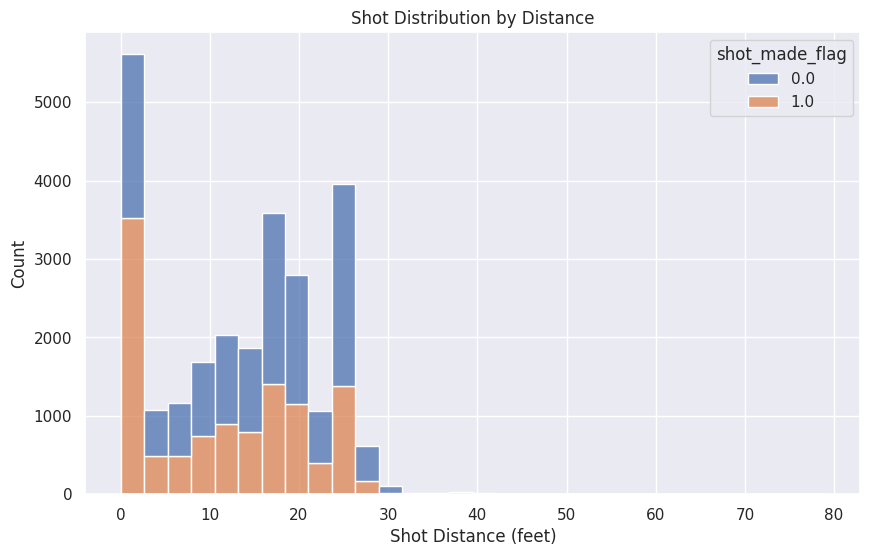

In [11]:
#Shots by distance
plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x='shot_distance', hue='shot_made_flag',
             multiple='stack', bins=30)
plt.title('Shot Distribution by Distance')
plt.xlabel('Shot Distance (feet)')
plt.ylabel('Count')
plt.show()

In [12]:
#Create distance from center of court
df_clean['distance_from_center'] = np.sqrt(df_clean['loc_x']**2 + df_clean['loc_y']**2)

<ipython-input-12-892e551846a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['distance_from_center'] = np.sqrt(df_clean['loc_x']**2 + df_clean['loc_y']**2)


In [13]:
#Create remaining time in game
df_clean['remaining_time'] = (4 - df_clean['period']) * 720 + df_clean['minutes_remaining'] * 60 + df_clean['seconds_remaining']

<ipython-input-13-8cbdefe47738>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['remaining_time'] = (4 - df_clean['period']) * 720 + df_clean['minutes_remaining'] * 60 + df_clean['seconds_remaining']


In [14]:
#Convert categorical variables to dummy variables
categorical_cols = ['action_type', 'combined_shot_type', 'shot_type', 'shot_zone_area',
                   'shot_zone_basic', 'shot_zone_range', 'opponent']
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

In [15]:
#Prepare features and target
X = df_encoded.drop(['shot_made_flag', 'team_id', 'team_name', 'game_event_id',
                     'game_id', 'game_date', 'matchup', 'season'], axis=1)
y = df_encoded['shot_made_flag']

In [16]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

Training set shape: (20557, 119)
Test set shape: (5140, 119)


In [19]:
from sklearn.linear_model import LinearRegression

In [21]:
#Create a model to predict shot percentage based on distance
dist_df = df_clean[['shot_distance', 'shot_made_flag']].copy()
dist_groups = dist_df.groupby('shot_distance')['shot_made_flag'].agg(['mean', 'count']).reset_index()
#Filter for reliable estimates
dist_groups = dist_groups[dist_groups['count'] > 10]

In [22]:
X_dist = dist_groups['shot_distance'].values.reshape(-1, 1)
y_dist = dist_groups['mean'].values

In [23]:
lr_model = LinearRegression()
lr_model.fit(X_dist, y_dist)

LinearRegression()

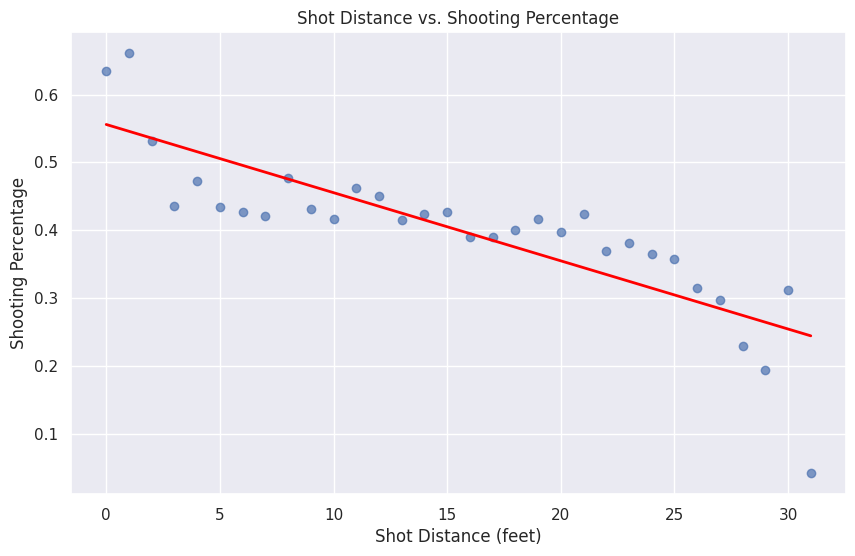

In [24]:
#Plot the relationship between distance and shooting percentage
plt.figure(figsize=(10, 6))
plt.scatter(X_dist, y_dist, alpha=0.7)
plt.plot(X_dist, lr_model.predict(X_dist), color='red', linewidth=2)
plt.title('Shot Distance vs. Shooting Percentage')
plt.xlabel('Shot Distance (feet)')
plt.ylabel('Shooting Percentage')
plt.grid(True)
plt.show()

In [25]:
print(f"Linear Regression Coefficient: {lr_model.coef_[0]:.4f}")
print(f"Linear Regression Intercept: {lr_model.intercept_:.4f}")

Linear Regression Coefficient: -0.0101
Linear Regression Intercept: 0.5559


In [26]:
#Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

In [27]:
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Results:
Accuracy: 0.6811

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.86      0.75      2887
         1.0       0.71      0.45      0.56      2253

    accuracy                           0.68      5140
   macro avg       0.69      0.66      0.65      5140
weighted avg       0.69      0.68      0.67      5140



In [28]:
#Feature importance
logreg_coefs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
})
logreg_coefs = logreg_coefs.sort_values('Coefficient', ascending=False)

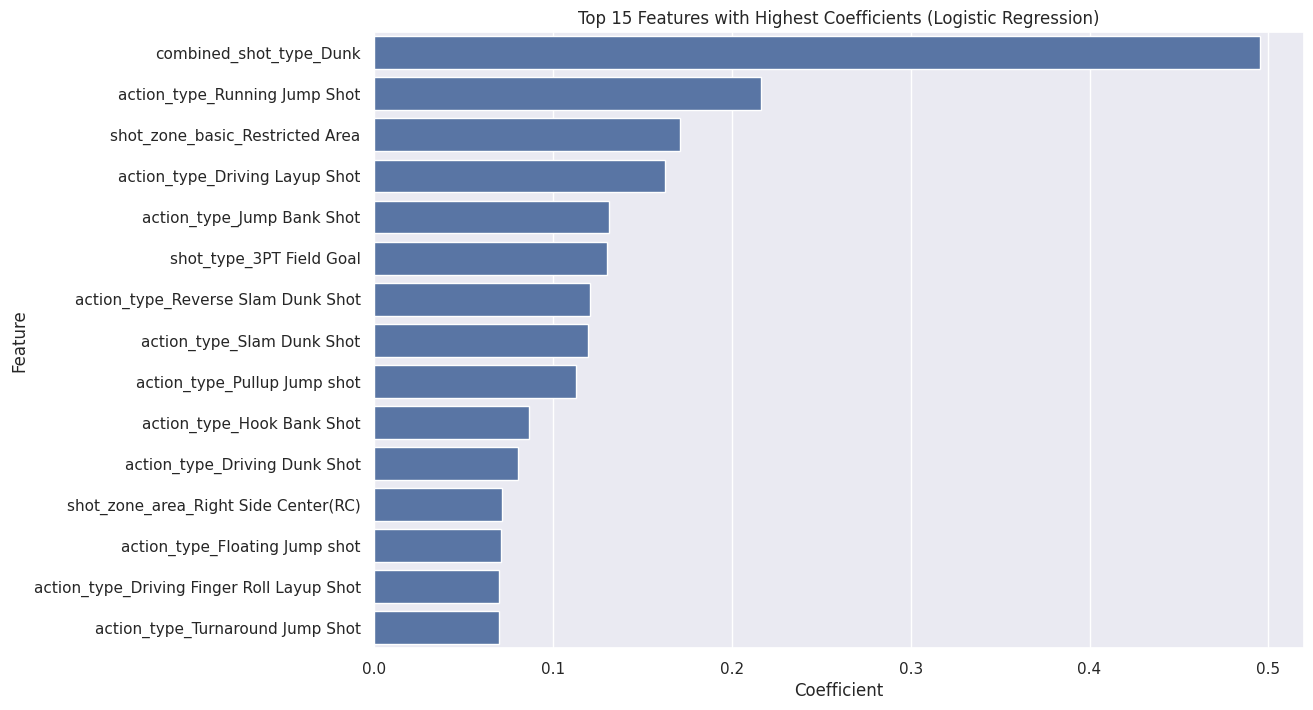

In [29]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=logreg_coefs.head(15))
plt.title('Top 15 Features with Highest Coefficients (Logistic Regression)')
plt.show()

In [30]:
#K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [31]:
print("\nK-Nearest Neighbors Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Results:
Accuracy: 0.6243

Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.72      0.68      2887
         1.0       0.58      0.51      0.54      2253

    accuracy                           0.62      5140
   macro avg       0.62      0.61      0.61      5140
weighted avg       0.62      0.62      0.62      5140



In [34]:
#Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

In [35]:
print("\nDecision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Results:
Accuracy: 0.6813

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.85      0.75      2887
         1.0       0.70      0.47      0.56      2253

    accuracy                           0.68      5140
   macro avg       0.69      0.66      0.66      5140
weighted avg       0.69      0.68      0.67      5140



In [36]:
#Feature importance for decision tree
dt_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
})
dt_importances = dt_importances.sort_values('Importance', ascending=False)

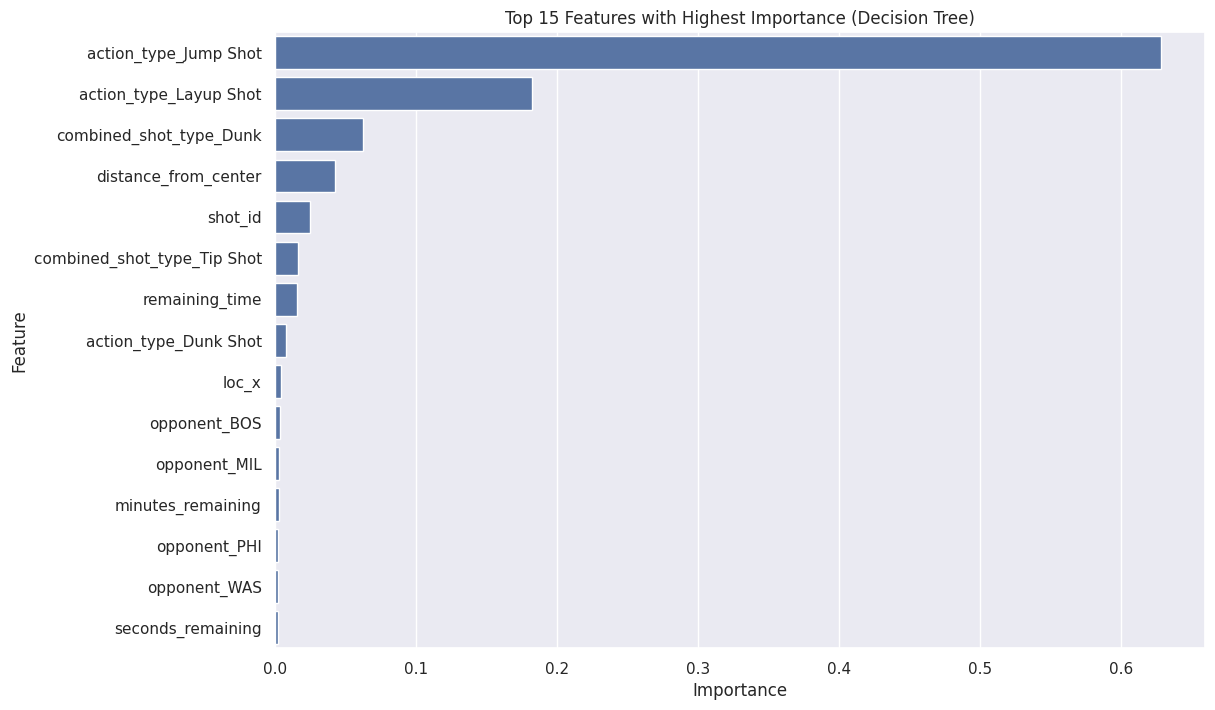

In [37]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=dt_importances.head(15))
plt.title('Top 15 Features with Highest Importance (Decision Tree)')
plt.show()

In [38]:
#Neural Network with PyTorch
#Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.FloatTensor(y_train.values)
y_test_tensor = torch.FloatTensor(y_test.values)

In [39]:
#Define the neural network
class ShotPredictionNN(nn.Module):
    def __init__(self, input_size):
        super(ShotPredictionNN, self).__init__()
        self.layer1 = nn.Linear(input_size, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.dropout(x)
        x = self.relu(self.layer3(x))
        x = self.sigmoid(self.layer4(x))
        return x

In [40]:
#Start the model
input_size = X_train_scaled.shape[1]
model = ShotPredictionNN(input_size)

In [41]:
#Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [42]:
#Training the model
num_epochs = 50
batch_size = 64
losses = []

In [43]:
for epoch in range(num_epochs):
    #Mini-batch training
    for i in range(0, len(X_train_tensor), batch_size):
        #Get mini-batch
        batch_X = X_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size].view(-1, 1)
        #Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        #Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    #Track loss for plotting
    losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/50], Loss: 0.4333
Epoch [20/50], Loss: 0.3599
Epoch [30/50], Loss: 0.3739
Epoch [40/50], Loss: 0.3473
Epoch [50/50], Loss: 0.3266


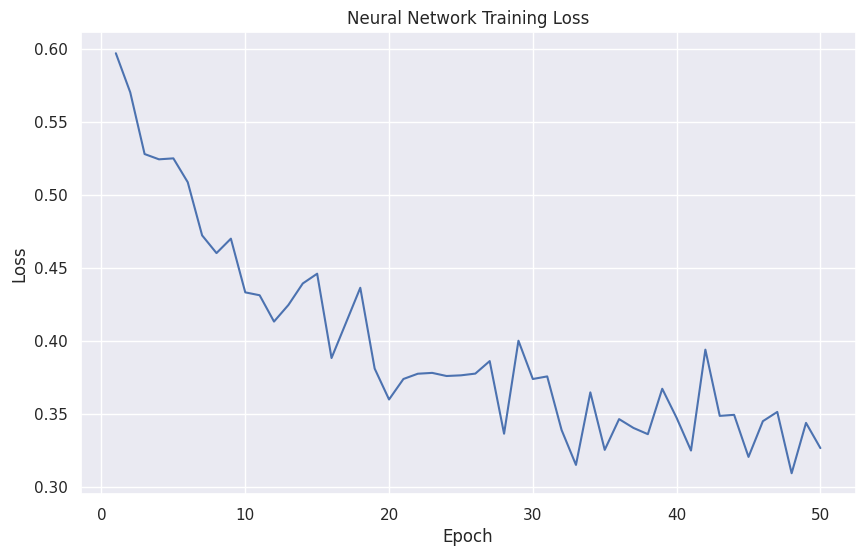

In [44]:
#Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), losses)
plt.title('Neural Network Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [45]:
#Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test_tensor)
    y_pred_nn = (y_pred_probs > 0.5).float().numpy().flatten()

In [46]:
print("\nNeural Network Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))


Neural Network Results:
Accuracy: 0.6609

Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.86      0.74      2887
         1.0       0.69      0.41      0.52      2253

    accuracy                           0.66      5140
   macro avg       0.67      0.63      0.63      5140
weighted avg       0.67      0.66      0.64      5140



In [47]:
#Lets compare the models
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Neural Network']
accuracies = [
    accuracy_score(y_test, y_pred_logreg),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_nn)
]


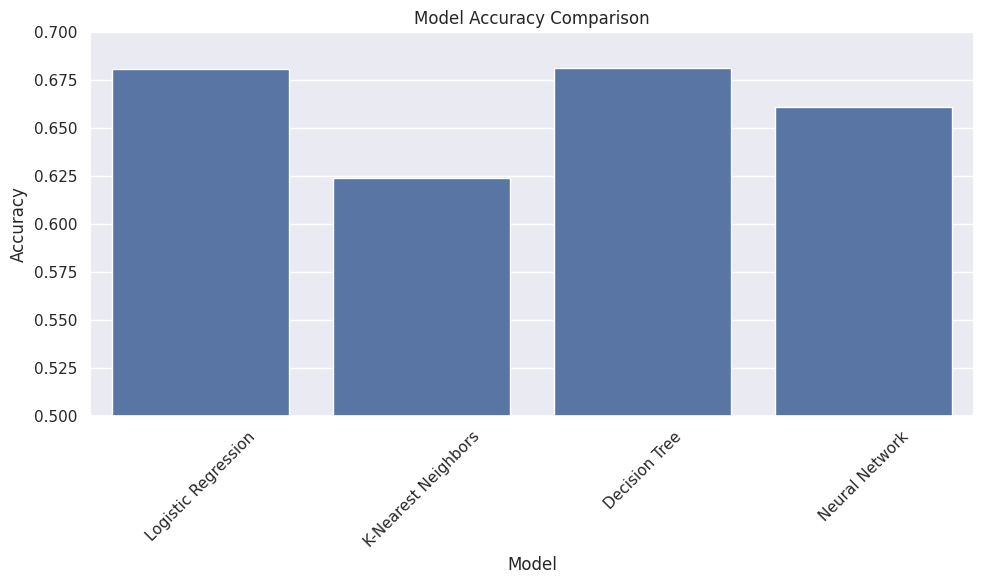

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.5, 0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
#Cross-validation for model evaluation
from sklearn.model_selection import cross_val_score
#Define models for cross-validation
logreg_cv = LogisticRegression(max_iter=1000, random_state=42)
knn_cv = KNeighborsClassifier(n_neighbors=5)
dt_cv = DecisionTreeClassifier(random_state=42, max_depth=5)

In [51]:
#Perform cross-validation
cv_results = {}
cv_results['Logistic Regression'] = cross_val_score(logreg_cv, X_train_scaled, y_train, cv=5)
cv_results['K-Nearest Neighbors'] = cross_val_score(knn_cv, X_train_scaled, y_train, cv=5)
cv_results['Decision Tree'] = cross_val_score(dt_cv, X_train_scaled, y_train, cv=5)

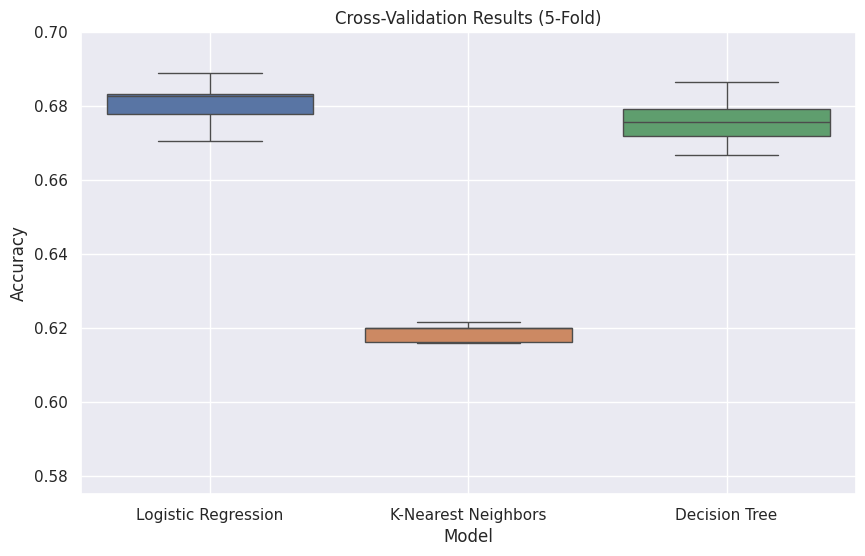

In [53]:
#Plot cross-validation results
plt.figure(figsize=(10, 6))
cv_df = pd.DataFrame(cv_results)
sns.boxplot(data=cv_df)
plt.title('Cross-Validation Results (5-Fold)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.575, 0.7)
plt.grid(True)
plt.show()

In [54]:
#Cross-validation scores
for model_name, scores in cv_results.items():
    print(f"{model_name} - Mean CV Accuracy: {scores.mean():.4f}")

Logistic Regression - Mean CV Accuracy: 0.6806
K-Nearest Neighbors - Mean CV Accuracy: 0.6187
Decision Tree - Mean CV Accuracy: 0.6760


In [56]:
#Model Complexity Analysis for Decision Trees
from sklearn.model_selection import validation_curve
#Generate validation curve for decision tree max_depth
max_depths = np.arange(1, 20)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(random_state=42),
    X_train_scaled, y_train,
    param_name="max_depth",
    param_range=max_depths,
    cv=5,
    scoring="accuracy"
)

In [57]:
#Calculate mean and std for train/test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

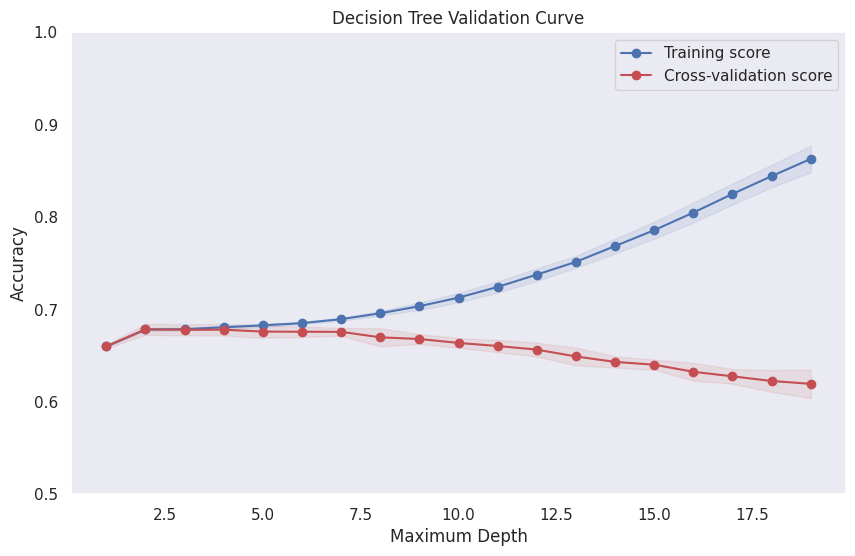

In [59]:
#Plot validation curve
plt.figure(figsize=(10, 6))
plt.title("Decision Tree Validation Curve")
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.0)
plt.grid()
plt.fill_between(max_depths, train_mean - train_std,
                 train_mean + train_std, alpha=0.1, color="b")
plt.fill_between(max_depths, test_mean - test_std,
                 test_mean + test_std, alpha=0.1, color="r")
plt.plot(max_depths, train_mean, 'o-', color="b", label="Training score")
plt.plot(max_depths, test_mean, 'o-', color="r", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [60]:
#Visualize shot predictions on the court and create a spatial representation of prediction accuracy
court_preds = df_clean[['loc_x', 'loc_y', 'shot_made_flag']].copy()

In [61]:
#Bin court locations
court_preds['x_bin'] = pd.cut(court_preds['loc_x'], bins=20)
court_preds['y_bin'] = pd.cut(court_preds['loc_y'], bins=20)

In [62]:
#Group by location bins and calculate accuracy
court_accuracy = court_preds.groupby(['x_bin', 'y_bin'])['shot_made_flag'].agg(['mean', 'count']).reset_index()
#Filter for reliable estimates
court_accuracy = court_accuracy[court_accuracy['count'] > 5]

<ipython-input-62-24b69a089103>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  court_accuracy = court_preds.groupby(['x_bin', 'y_bin'])['shot_made_flag'].agg(['mean', 'count']).reset_index()


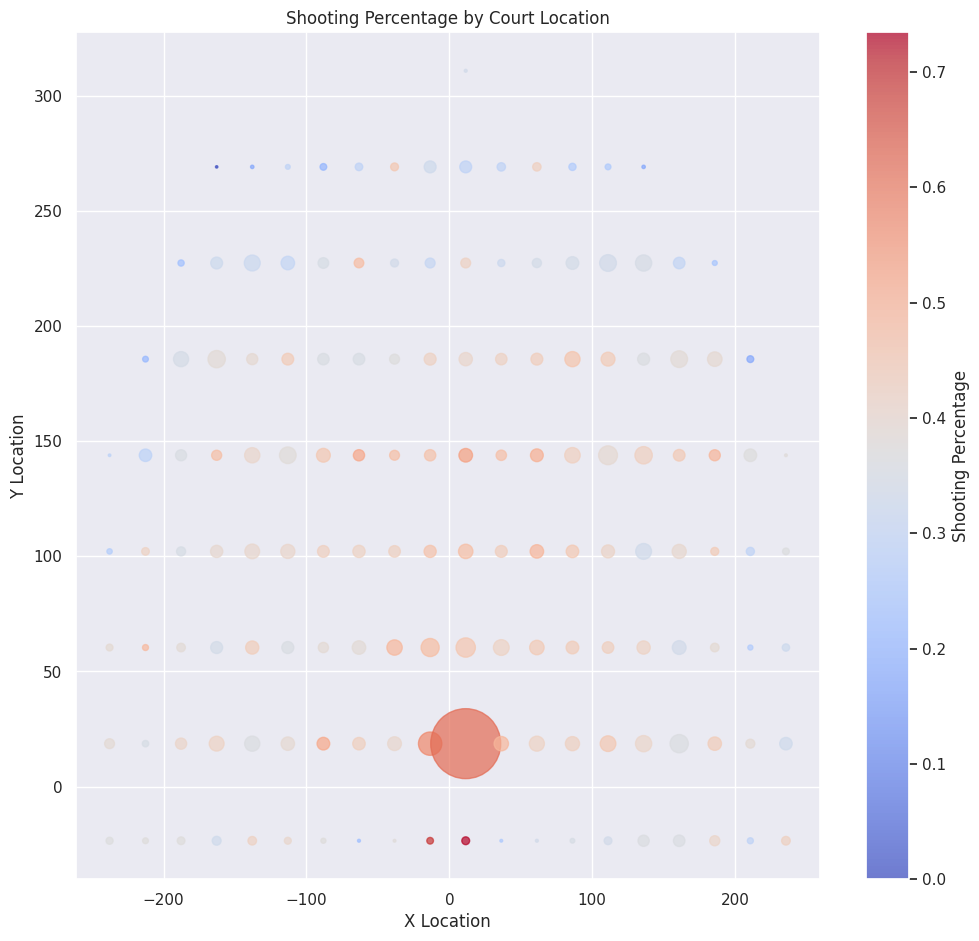

In [63]:
#Plot shooting percentage by court location
plt.figure(figsize=(12, 11))
x_centers = court_accuracy['x_bin'].apply(lambda x: x.mid)
y_centers = court_accuracy['y_bin'].apply(lambda x: x.mid)
plt.scatter(x_centers, y_centers, c=court_accuracy['mean'],
            cmap='coolwarm', s=court_accuracy['count']*0.5, alpha=0.7)
plt.colorbar(label='Shooting Percentage')
plt.title('Shooting Percentage by Court Location')
plt.xlabel('X Location')
plt.ylabel('Y Location')
plt.grid(True)
plt.show()

In [64]:
#Key insights and conclusion

In [65]:
print("\nKey Features for Predicting Shot Success:")
print("1. From Logistic Regression:")
for feature, coef in zip(logreg_coefs['Feature'].head(5), logreg_coefs['Coefficient'].head(5)):
    print(f"   - {feature}: {coef:.4f}")


Key Features for Predicting Shot Success:
1. From Logistic Regression:
   - combined_shot_type_Dunk: 0.4950
   - action_type_Running Jump Shot: 0.2161
   - shot_zone_basic_Restricted Area: 0.1713
   - action_type_Driving Layup Shot: 0.1627
   - action_type_Jump Bank Shot: 0.1315


In [67]:
print("\n2. From Decision Tree:")
for feature, imp in zip(dt_importances['Feature'].head(5), dt_importances['Importance'].head(5)):
    print(f"   - {feature}: {imp:.4f}")


2. From Decision Tree:
   - action_type_Jump Shot: 0.6280
   - action_type_Layup Shot: 0.1822
   - combined_shot_type_Dunk: 0.0627
   - distance_from_center: 0.0427
   - shot_id: 0.0245


In [71]:
print("\nModel Performance Summary:")
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Neural Network']
accuracies = [
    accuracy_score(y_test, y_pred_logreg),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_nn)
]

print("Accuracy:")
for model, acc in zip(models, accuracies):
    print(f"   - {model}: {acc:.4f}")


Model Performance Summary:
Accuracy:
   - Logistic Regression: 0.6811
   - K-Nearest Neighbors: 0.6243
   - Decision Tree: 0.6813
   - Neural Network: 0.6609


In conclusion, the decision tree model provided the best performance for predicting Kobe Bryant's shots, followed by logistic regression. The most important factors for predicting shot success include shot distance, remaining time, and shot location on the court.